# 1. Setup and Get Data

### 1.1 Install Dependencies and Setup

In [2]:
!pip install labelme tensorflow matplotlib albumentations

     ---------------------------------------- 0.0/14.6 MB ? eta -:--:--
     ---------------------------------------- 0.1/14.6 MB 2.4 MB/s eta 0:00:07
     - -------------------------------------- 0.5/14.6 MB 5.1 MB/s eta 0:00:03
     -- ------------------------------------- 0.8/14.6 MB 6.2 MB/s eta 0:00:03
     -- ------------------------------------- 0.8/14.6 MB 6.2 MB/s eta 0:00:03
     ----- ---------------------------------- 1.8/14.6 MB 8.4 MB/s eta 0:00:02
     ----- ---------------------------------- 2.0/14.6 MB 7.0 MB/s eta 0:00:02
     ------ --------------------------------- 2.5/14.6 MB 7.7 MB/s eta 0:00:02
     -------- ------------------------------- 3.1/14.6 MB 8.2 MB/s eta 0:00:02
     --------- ------------------------------ 3.7/14.6 MB 8.6 MB/s eta 0:00:02
     ----------- ---------------------------- 4.2/14.6 MB 9.0 MB/s eta 0:00:02
     ------------- -------------------------- 4.8/14.6 MB 9.3 MB/s eta 0:00:02
     -------------- ------------------------- 5.4/14.6 MB 9

In [3]:
!pip install opencv-python --user

In [33]:
!pip install --force-reinstall --user opencv-python

  Using cached opencv_python-4.7.0.72-cp37-abi3-win_amd64.whl (38.2 MB)
  Using cached numpy-1.24.2-cp310-cp310-win_amd64.whl (14.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.2
    Uninstalling numpy-1.24.2:
      Successfully uninstalled numpy-1.24.2
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.5.5.64
    Uninstalling opencv-python-4.5.5.64:
      Successfully uninstalled opencv-python-4.5.5.64


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.24.2 which is incompatible.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.24.2 which is incompatible.


### 1.2 Collect Images Using OpenCV

In [5]:
import os
import time
import uuid
import cv2

In [94]:
IMAGES_PATH = os.path.join('data','images')
number_images = 30

In [97]:
cap = cv2.VideoCapture(0)
for imgnum in range(number_images):
    print('Collecting image {}'.format(imgnum))
    ret, frame = cap.read()
    imgname = os.path.join(IMAGES_PATH,f'{str(uuid.uuid1())}.jpg')
    cv2.imwrite(imgname, frame)
    cv2.imshow('frame', frame)
    time.sleep(0.5)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

### 1.3 Annotate Images with LabelMe

In [98]:
!labelme

C:\Users\79173\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\79173\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\79173\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


# 2. Review Dataset and Build Image Loading Function

### 2.1 Import TF and Deps

In [7]:
import tensorflow as tf
import json
import numpy as np
from matplotlib import pyplot as plt

### 2.2 Limit GPU Memory Growth

In [20]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [21]:
tf.config.list_physical_devices('GPU')

[]

### 2.3 Load Image into TF Data Pipeline

In [99]:
images = tf.data.Dataset.list_files('data\\images\\*.jpg', shuffle=False)

In [100]:
images.as_numpy_iterator().next()

b'data\\images\\004ed147-e099-11ed-afd4-00155d03258a.jpg'

In [101]:
def load_image(x): 
    byte_img = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byte_img)
    return img

In [102]:
images = images.map(load_image)

In [103]:
images.as_numpy_iterator().next()

array([[[169, 170, 175],
        [168, 169, 174],
        [168, 169, 174],
        ...,
        [117, 123, 119],
        [115, 122, 115],
        [115, 122, 114]],

       [[169, 170, 175],
        [168, 169, 174],
        [168, 169, 174],
        ...,
        [119, 125, 121],
        [116, 123, 116],
        [114, 121, 113]],

       [[170, 171, 175],
        [169, 170, 174],
        [168, 169, 173],
        ...,
        [121, 126, 122],
        [117, 122, 116],
        [115, 120, 114]],

       ...,

       [[ 50,  49,  63],
        [ 50,  49,  63],
        [ 50,  50,  62],
        ...,
        [ 99, 123, 127],
        [108, 134, 135],
        [114, 142, 143]],

       [[ 50,  48,  62],
        [ 48,  47,  61],
        [ 48,  47,  61],
        ...,
        [102, 133, 138],
        [107, 141, 140],
        [110, 146, 142]],

       [[ 51,  49,  63],
        [ 49,  47,  61],
        [ 47,  46,  60],
        ...,
        [106, 141, 145],
        [105, 144, 143],
        [103, 144, 138]]

In [104]:
type(images)

tensorflow.python.data.ops.map_op._MapDataset

### 2.4 View Raw Images with Matplotlib

In [105]:
image_generator = images.batch(4).as_numpy_iterator()

In [106]:
plot_images = image_generator.next()

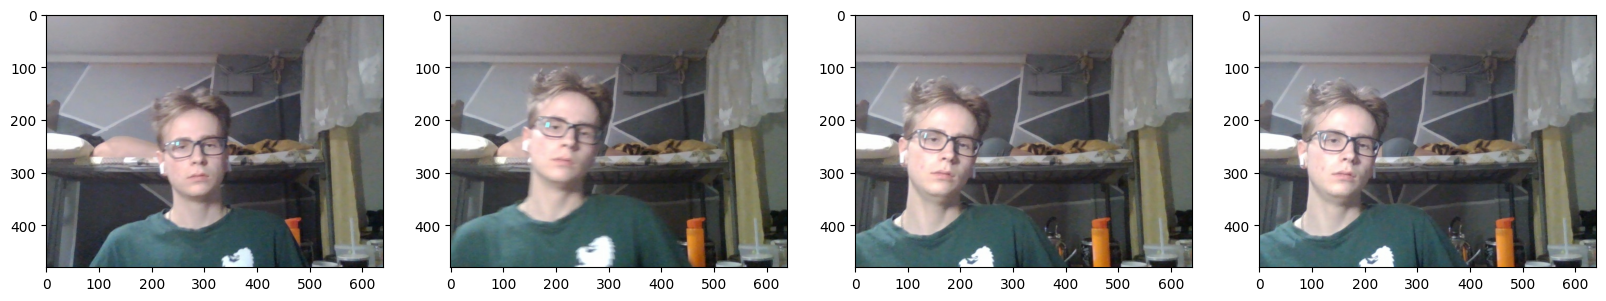

In [107]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, image in enumerate(plot_images):
    ax[idx].imshow(image) 
plt.show()

# 3. Partition Unaugmented Data

### 3.1 MANUALLY SPLT DATA INTO TRAIN TEST AND VAL

In [ ]:
90*.7 # 63 to train

In [ ]:
90*.15 # 14 and 13 to test and val

### 3.2 Move the Matching Labels

In [108]:
for folder in ['train','test','val']:
    for file in os.listdir(os.path.join('data', folder, 'images')):
        
        filename = file.split('.')[0]+'.json'
        existing_filepath = os.path.join('data','labels', filename)
        if os.path.exists(existing_filepath): 
            new_filepath = os.path.join('data',folder,'labels',filename)
            os.replace(existing_filepath, new_filepath)      

# 4. Apply Image Augmentation on Images and Labels using Albumentations

### 4.1 Setup Albumentations Transform Pipeline

In [109]:
import albumentations as alb

In [110]:
augmentor = alb.Compose([alb.RandomCrop(width=450, height=450), 
                         alb.HorizontalFlip(p=0.5), 
                         alb.RandomBrightnessContrast(p=0.2),
                         alb.RandomGamma(p=0.2), 
                         alb.RGBShift(p=0.2), 
                         alb.VerticalFlip(p=0.5)], 
                       bbox_params=alb.BboxParams(format='albumentations', 
                                                  label_fields=['class_labels']))

### 4.2 Load a Test Image and Annotation with OpenCV and JSON

In [114]:
img = cv2.imread(os.path.join('data','train', 'images','f4bd315b-e098-11ed-8646-00155d03258a.jpg'))

In [115]:
with open(os.path.join('data', 'train', 'labels', 'f4bd315b-e098-11ed-8646-00155d03258a.json'), 'r') as f:
    label = json.load(f)

In [116]:
label['shapes'][0]['points']

[[52.05128205128206, 18.974358974358974], [310.0, 352.3076923076923]]

### 4.3 Extract Coordinates and Rescale to Match Image Resolution

In [117]:
coords = [0,0,0,0]
coords[0] = label['shapes'][0]['points'][0][0]
coords[1] = label['shapes'][0]['points'][0][1]
coords[2] = label['shapes'][0]['points'][1][0]
coords[3] = label['shapes'][0]['points'][1][1]

In [118]:
coords

[52.05128205128206, 18.974358974358974, 310.0, 352.3076923076923]

In [119]:
coords = list(np.divide(coords, [640,480,640,480]))

In [120]:
coords

[0.08133012820512822, 0.03952991452991453, 0.484375, 0.733974358974359]

### 4.4 Apply Augmentations and View Results

In [121]:
augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])

In [122]:
augmented['bboxes'][0][2:]

(0.4666666666666667, 0.722905982905983)

In [123]:
augmented['bboxes']

[(0.0, 0.0, 0.4666666666666667, 0.722905982905983)]

In [124]:
augmented['image']

array([[[130, 122, 132],
        [131, 123, 133],
        [139, 130, 140],
        ...,
        [ 94,  91,  93],
        [ 95,  93,  93],
        [ 96,  94,  94]],

       [[122, 114, 125],
        [121, 112, 122],
        [133, 122, 132],
        ...,
        [ 93,  88,  90],
        [ 96,  91,  92],
        [ 98,  94,  93]],

       [[130, 118, 130],
        [121, 109, 121],
        [130, 116, 127],
        ...,
        [ 93,  88,  89],
        [ 95,  91,  90],
        [ 98,  95,  91]],

       ...,

       [[ 92,  83,  49],
        [ 94,  84,  50],
        [ 96,  84,  50],
        ...,
        [170, 166, 161],
        [171, 167, 162],
        [173, 169, 164]],

       [[ 93,  84,  50],
        [ 94,  85,  51],
        [ 95,  85,  51],
        ...,
        [174, 165, 161],
        [175, 166, 162],
        [176, 167, 163]],

       [[ 93,  84,  50],
        [ 94,  85,  51],
        [ 96,  85,  53],
        ...,
        [180, 165, 162],
        [177, 165, 161],
        [174, 164, 157]]

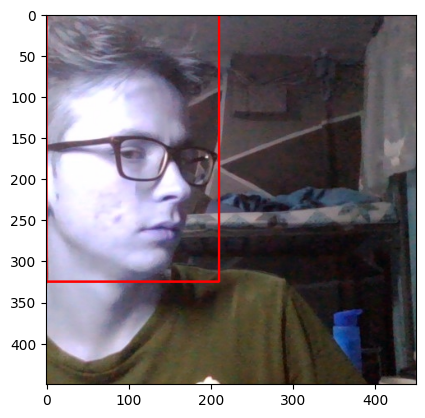

In [125]:
cv2.rectangle(augmented['image'], 
              tuple(np.multiply(augmented['bboxes'][0][:2], [450,450]).astype(int)),
              tuple(np.multiply(augmented['bboxes'][0][2:], [450,450]).astype(int)), 
                    (255,0,0), 2)

plt.imshow(augmented['image'])

# 5. Build and Run Augmentation Pipeline

### 5.1 Run Augmentation Pipeline

In [127]:
for partition in ['train','test','val']: 
    for image in os.listdir(os.path.join('data', partition, 'images')):
        img = cv2.imread(os.path.join('data', partition, 'images', image))

        coords = [0,0,0.00001,0.00001]
        label_path = os.path.join('data', partition, 'labels', f'{image.split(".")[0]}.json')
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                label = json.load(f)

            coords[0] = label['shapes'][0]['points'][0][0]
            coords[1] = label['shapes'][0]['points'][0][1]
            coords[2] = label['shapes'][0]['points'][1][0]
            coords[3] = label['shapes'][0]['points'][1][1]
            coords = list(np.divide(coords, [640,480,640,480]))

        try: 
            for x in range(60):
                augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])
                cv2.imwrite(os.path.join('aug_data', partition, 'images', f'{image.split(".")[0]}.{x}.jpg'), augmented['image'])

                annotation = {}
                annotation['image'] = image

                if os.path.exists(label_path):
                    if len(augmented['bboxes']) == 0: 
                        annotation['bbox'] = [0,0,0,0]
                        annotation['class'] = 0 
                    else: 
                        annotation['bbox'] = augmented['bboxes'][0]
                        annotation['class'] = 1
                else: 
                    annotation['bbox'] = [0,0,0,0]
                    annotation['class'] = 0 


                with open(os.path.join('aug_data', partition, 'labels', f'{image.split(".")[0]}.{x}.json'), 'w') as f:
                    json.dump(annotation, f)

        except Exception as e:
            print(e)

### 5.2 Load Augmented Images to Tensorflow Dataset

In [129]:
train_images = tf.data.Dataset.list_files('aug_data\\train\\images\\*.jpg', shuffle=False)
train_images = train_images.map(load_image)
train_images = train_images.map(lambda x: tf.image.resize(x, (120,120)))
train_images = train_images.map(lambda x: x/255)

In [130]:
test_images = tf.data.Dataset.list_files('aug_data\\test\\images\\*.jpg', shuffle=False)
test_images = test_images.map(load_image)
test_images = test_images.map(lambda x: tf.image.resize(x, (120,120)))
test_images = test_images.map(lambda x: x/255)

In [131]:
val_images = tf.data.Dataset.list_files('aug_data\\val\\images\\*.jpg', shuffle=False)
val_images = val_images.map(load_image)
val_images = val_images.map(lambda x: tf.image.resize(x, (120,120)))
val_images = val_images.map(lambda x: x/255)

In [136]:
train_images.as_numpy_iterator().next()

array([[[0.47346812, 0.5362745 , 0.56556374],
        [0.45104167, 0.5260417 , 0.55104166],
        [0.15202206, 0.24105392, 0.29387254],
        ...,
        [0.16366422, 0.22169118, 0.23866421],
        [0.09313726, 0.12303922, 0.14166667],
        [0.07230392, 0.08952206, 0.11047794]],

       [[0.51170343, 0.54993874, 0.5896446 ],
        [0.47071078, 0.5221814 , 0.5540441 ],
        [0.17169118, 0.2338848 , 0.28259805],
        ...,
        [0.10582108, 0.17640932, 0.1851103 ],
        [0.06139706, 0.11029412, 0.10435049],
        [0.10484069, 0.1384804 , 0.14405638]],

       [[0.48063725, 0.5079657 , 0.5695466 ],
        [0.4871936 , 0.52916664, 0.5674632 ],
        [0.19509804, 0.23057598, 0.28921568],
        ...,
        [0.1120098 , 0.18651961, 0.2134804 ],
        [0.06133578, 0.11813726, 0.15116422],
        [0.10814951, 0.15441176, 0.171875  ]],

       ...,

       [[0.61194855, 0.62420344, 0.6428309 ],
        [0.6240196 , 0.6269608 , 0.64705884],
        [0.6313726 , 0

# 6. Prepare Labels

### 6.1 Build Label Loading Function

In [137]:
def load_labels(label_path):
    with open(label_path.numpy(), 'r', encoding = "utf-8") as f:
        label = json.load(f)
        
    return [label['class']], label['bbox']

### 6.2 Load Labels to Tensorflow Dataset

In [141]:
train_labels = tf.data.Dataset.list_files('aug_data\\train\\labels\\*.json', shuffle=False)
train_labels = train_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [142]:
test_labels = tf.data.Dataset.list_files('aug_data\\test\\labels\\*.json', shuffle=False)
test_labels = test_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [143]:
val_labels = tf.data.Dataset.list_files('aug_data\\val\\labels\\*.json', shuffle=False)
val_labels = val_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [144]:
train_labels.as_numpy_iterator().next()

(array([1], dtype=uint8),
 array([0.3462, 0.2837, 0.6904, 0.7554], dtype=float16))

# 7. Combine Label and Image Samples

### 7.1 Check Partition Lengths

In [145]:
len(train_images), len(train_labels), len(test_images), len(test_labels), len(val_images), len(val_labels)

(3780, 3780, 780, 780, 840, 840)

### 7.2 Create Final Datasets (Images/Labels)

In [146]:
train = tf.data.Dataset.zip((train_images, train_labels))
train = train.shuffle(5000)
train = train.batch(8)
train = train.prefetch(4)

In [147]:
test = tf.data.Dataset.zip((test_images, test_labels))
test = test.shuffle(1300)
test = test.batch(8)
test = test.prefetch(4)

In [148]:
val = tf.data.Dataset.zip((val_images, val_labels))
val = val.shuffle(1000)
val = val.batch(8)
val = val.prefetch(4)

In [149]:
train.as_numpy_iterator().next()[1]

(array([[1],
        [1],
        [0],
        [1],
        [0],
        [1],
        [1],
        [1]], dtype=uint8),
 array([[0.3074, 0.1204, 0.713 , 0.7026],
        [0.579 , 0.1028, 1.    , 0.8115],
        [0.    , 0.    , 0.    , 0.    ],
        [0.4263, 0.1635, 0.9277, 0.771 ],
        [0.    , 0.    , 0.    , 0.    ],
        [0.2449, 0.2283, 0.7734, 0.971 ],
        [0.503 , 0.1495, 0.9565, 0.7773],
        [0.3547, 0.1117, 0.9097, 0.8203]], dtype=float16))

### 7.3 View Images and Annotations

In [150]:
data_samples = train.as_numpy_iterator()

In [155]:
res = data_samples.next()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


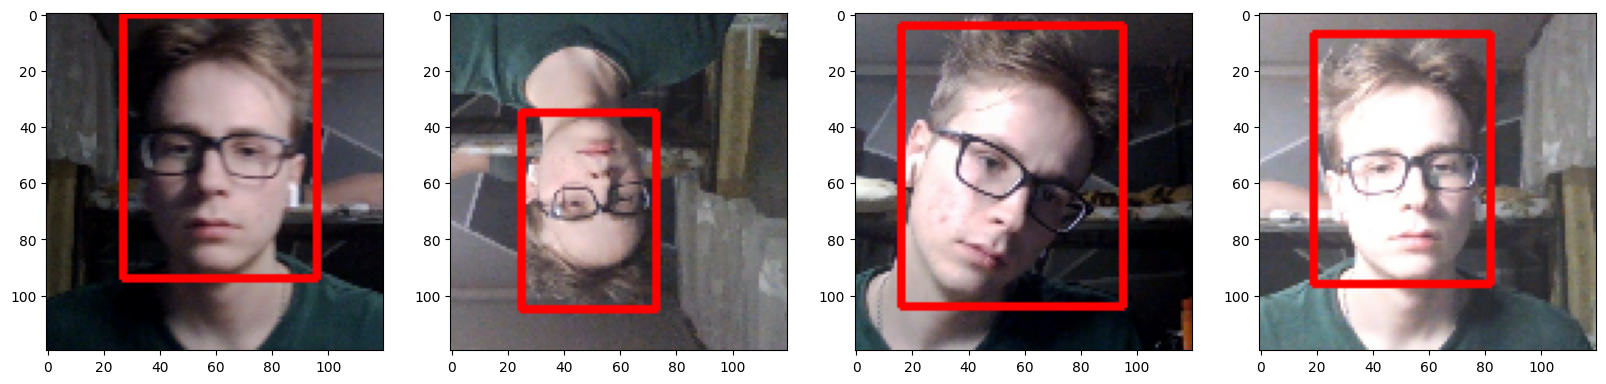

In [156]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = res[0][idx]
    sample_coords = res[1][1][idx]
    
    cv2.rectangle(sample_image, 
                  tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                  tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
                        (255,0,0), 2)

    ax[idx].imshow(sample_image)

# 8. Build Deep Learning using the Functional API

### 8.1 Import Layers and Base Network

In [157]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dense, GlobalMaxPooling2D
from tensorflow.keras.applications import VGG16

### 8.2 Download VGG16

In [158]:
vgg = VGG16(include_top=False)

58889256/58889256 [==============================] - 6s 0us/step


In [159]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

### 8.3 Build instance of Network

In [161]:
def build_model(): 
    input_layer = Input(shape=(120,120,3))
    
    vgg = VGG16(include_top=False)(input_layer)

    # Classification Model  
    f1 = GlobalMaxPooling2D()(vgg)
    class1 = Dense(2048, activation='relu')(f1)
    class2 = Dense(1, activation='sigmoid')(class1)
    
    # Bounding box model
    f2 = GlobalMaxPooling2D()(vgg)
    regress1 = Dense(2048, activation='relu')(f2)
    regress2 = Dense(4, activation='sigmoid')(regress1)
    
    facetracker = Model(inputs=input_layer, outputs=[class2, regress2])
    return facetracker

### 8.4 Test out Neural Network

In [162]:
facetracker = build_model()

In [163]:
facetracker.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 120, 120, 3  0           []                               
                                )]                                                                
                                                                                                  
 vgg16 (Functional)             (None, None, None,   14714688    ['input_2[0][0]']                
                                512)                                                              
                                                                                                  
 global_max_pooling2d (GlobalMa  (None, 512)         0           ['vgg16[0][0]']                  
 xPooling2D)                                                                                  

In [164]:
X, y = train.as_numpy_iterator().next()

In [165]:
X.shape

(8, 120, 120, 3)

In [168]:
classes, coords = facetracker.predict(X)

1/1 [==============================] - 1s 1s/step


In [169]:
classes, coords

(array([[0.59917885],
        [0.52695936],
        [0.5522572 ],
        [0.5789128 ],
        [0.53009766],
        [0.54075897],
        [0.5789266 ],
        [0.49353272]], dtype=float32),
 array([[0.65780246, 0.3214046 , 0.47135967, 0.63057536],
        [0.67664677, 0.3109341 , 0.46186286, 0.6602622 ],
        [0.6741077 , 0.30816877, 0.50780094, 0.5655308 ],
        [0.64611864, 0.38143018, 0.46290708, 0.5610564 ],
        [0.70573276, 0.35107988, 0.4531852 , 0.57813245],
        [0.6587056 , 0.36291105, 0.5246231 , 0.6083994 ],
        [0.64989054, 0.39745006, 0.45568222, 0.54923266],
        [0.68545604, 0.38744903, 0.46060723, 0.6513442 ]], dtype=float32))

# 9. Define Losses and Optimizers

### 9.1 Define Optimizer and LR

In [171]:
batches_per_epoch = len(train)
lr_decay = (1./0.75 -1)/batches_per_epoch

In [173]:
opt = tf.keras.optimizers.legacy.Adam(learning_rate=0.0001, decay=lr_decay)

### 9.2 Create Localization Loss and Classification Loss

In [174]:
def localization_loss(y_true, yhat):            
    delta_coord = tf.reduce_sum(tf.square(y_true[:,:2] - yhat[:,:2]))
                  
    h_true = y_true[:,3] - y_true[:,1] 
    w_true = y_true[:,2] - y_true[:,0] 

    h_pred = yhat[:,3] - yhat[:,1] 
    w_pred = yhat[:,2] - yhat[:,0] 
    
    delta_size = tf.reduce_sum(tf.square(w_true - w_pred) + tf.square(h_true-h_pred))
    
    return delta_coord + delta_size

In [175]:
classloss = tf.keras.losses.BinaryCrossentropy()
regressloss = localization_loss

### 9.3 Test out Loss Metrics

In [176]:
localization_loss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=4.662213>

In [177]:
classloss(y[0], classes)

<tf.Tensor: shape=(), dtype=float32, numpy=0.59942394>

In [178]:
regressloss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=4.662213>

# 10. Train Neural Network

### 10.1 Create Custom Model Class

In [179]:
class FaceTracker(Model): 
    def __init__(self, eyetracker,  **kwargs): 
        super().__init__(**kwargs)
        self.model = eyetracker

    def compile(self, opt, classloss, localizationloss, **kwargs):
        super().compile(**kwargs)
        self.closs = classloss
        self.lloss = localizationloss
        self.opt = opt
    
    def train_step(self, batch, **kwargs): 
        
        X, y = batch
        
        with tf.GradientTape() as tape: 
            classes, coords = self.model(X, training=True)
            
            batch_classloss = self.closs(y[0], classes)
            batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
            
            total_loss = batch_localizationloss+0.5*batch_classloss
            
            grad = tape.gradient(total_loss, self.model.trainable_variables)
        
        opt.apply_gradients(zip(grad, self.model.trainable_variables))
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
    
    def test_step(self, batch, **kwargs): 
        X, y = batch
        
        classes, coords = self.model(X, training=False)
        
        batch_classloss = self.closs(y[0], classes)
        batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
        total_loss = batch_localizationloss+0.5*batch_classloss
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
        
    def call(self, X, **kwargs): 
        return self.model(X, **kwargs)

In [180]:
model = FaceTracker(facetracker)

In [181]:
model.compile(opt, classloss, regressloss)

### 10.2 Train

In [182]:
logdir='logs'

In [183]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [184]:
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/10
473/473 [==============================] - 1270s 3s/step - total_loss: 0.3943 - class_loss: 0.0948 - regress_loss: 0.3469 - val_total_loss: 0.0669 - val_class_loss: 2.6299e-04 - val_regress_loss: 0.0667
Epoch 2/10
473/473 [==============================] - 1227s 3s/step - total_loss: 0.0913 - class_loss: 0.0226 - regress_loss: 0.0800 - val_total_loss: 0.0248 - val_class_loss: 0.0011 - val_regress_loss: 0.0242
Epoch 3/10
473/473 [==============================] - 1340s 3s/step - total_loss: 0.0586 - class_loss: 0.0127 - regress_loss: 0.0523 - val_total_loss: 0.0537 - val_class_loss: 0.0093 - val_regress_loss: 0.0490
Epoch 4/10
473/473 [==============================] - 2344s 5s/step - total_loss: 0.0379 - class_loss: 0.0133 - regress_loss: 0.0313 - val_total_loss: 0.0510 - val_class_loss: 0.0038 - val_regress_loss: 0.0491
Epoch 5/10
473/473 [==============================] - 1588s 3s/step - total_loss: 0.0328 - class_loss: 0.0067 - regress_loss: 0.0295 - val_total_loss: 0.122

### 10.3 Plot Performance

In [185]:
hist.history

{'total_loss': [0.021607447415590286,
  0.010448068380355835,
  0.0073380786925554276,
  0.00491286488249898,
  0.06519957631826401,
  0.004474175628274679,
  0.005219952668994665,
  0.004788361955434084,
  0.007456087972968817,
  0.0006685733096674085],
 'class_loss': [0.00016396239516325295,
  0.00013342589954845607,
  1.469281687604962e-05,
  0.0011283336207270622,
  0.0005306407110765576,
  6.639232742600143e-05,
  0.001740538515150547,
  0.0004458789189811796,
  2.786605546134524e-05,
  0.00014696852304041386],
 'regress_loss': [0.021525466814637184,
  0.010381355881690979,
  0.007330732420086861,
  0.0043486980721354485,
  0.06493425369262695,
  0.004440979566425085,
  0.004349683411419392,
  0.004565422423183918,
  0.007442154921591282,
  0.0005950890481472015],
 'val_total_loss': [0.0668582022190094,
  0.02477533556520939,
  0.053673699498176575,
  0.05103299394249916,
  0.12283896654844284,
  0.0404486358165741,
  0.03557606041431427,
  0.009481058456003666,
  0.53416663408279

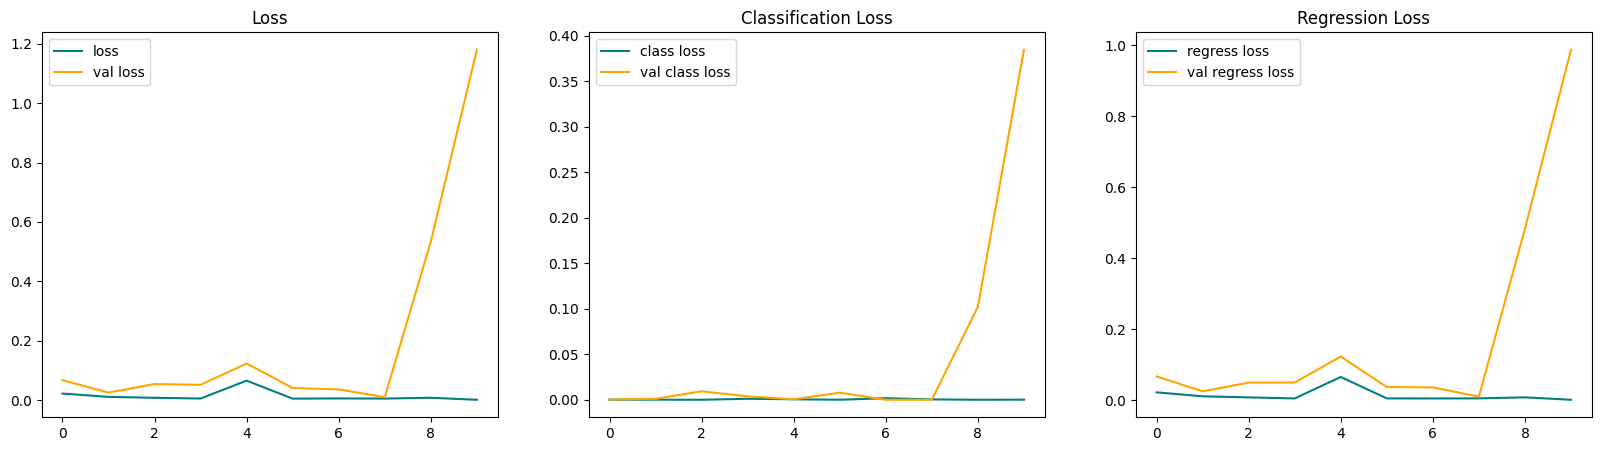

In [186]:
fig, ax = plt.subplots(ncols=3, figsize=(20,5))

ax[0].plot(hist.history['total_loss'], color='teal', label='loss')
ax[0].plot(hist.history['val_total_loss'], color='orange', label='val loss')
ax[0].title.set_text('Loss')
ax[0].legend()

ax[1].plot(hist.history['class_loss'], color='teal', label='class loss')
ax[1].plot(hist.history['val_class_loss'], color='orange', label='val class loss')
ax[1].title.set_text('Classification Loss')
ax[1].legend()

ax[2].plot(hist.history['regress_loss'], color='teal', label='regress loss')
ax[2].plot(hist.history['val_regress_loss'], color='orange', label='val regress loss')
ax[2].title.set_text('Regression Loss')
ax[2].legend()

plt.show()

# 11. Make Predictions

### 11.1 Make Predictions on Test Set

In [187]:
test_data = test.as_numpy_iterator()

In [188]:
test_sample = test_data.next()

In [189]:
yhat = facetracker.predict(test_sample[0])

1/1 [==============================] - 0s 300ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


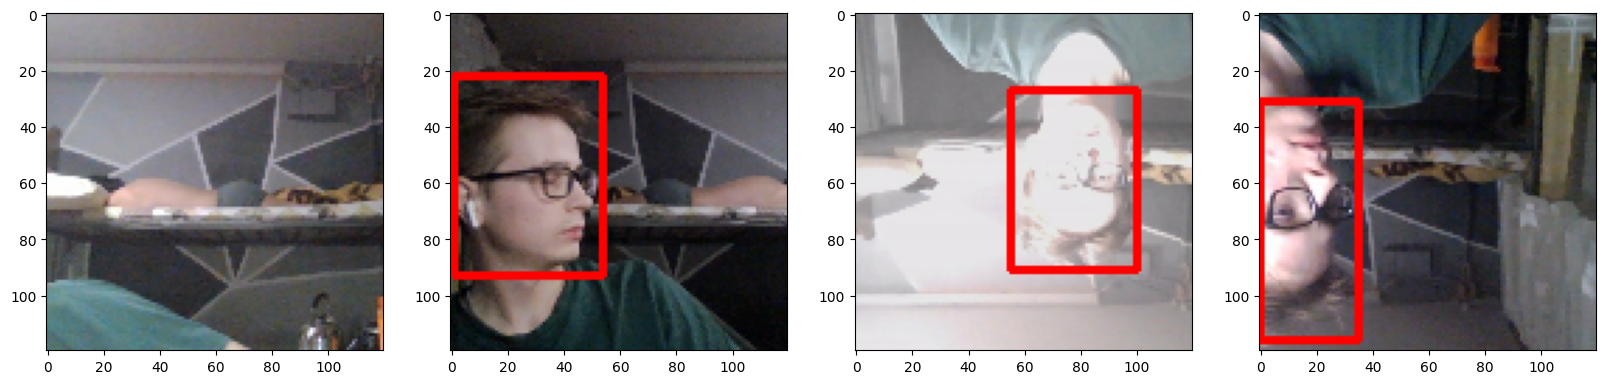

In [190]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = test_sample[0][idx]
    sample_coords = yhat[1][idx]
    
    if yhat[0][idx] > 0.9:
        cv2.rectangle(sample_image, 
                      tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
                            (255,0,0), 2)
    
    ax[idx].imshow(sample_image)

### 11.2 Save the Model

In [2]:
from tensorflow.keras.models import load_model

C:\Users\79173\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\79173\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\79173\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [192]:
facetracker.save('facetracker.h5')

In [3]:
facetracker = load_model('facetracker.h5')

### 11.3 Real Time Detection

In [10]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    _ , frame = cap.read()
    frame = frame[50:500, 50:500,:]
    
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    resized = tf.image.resize(rgb, (120,120))
    
    yhat = facetracker.predict(np.expand_dims(resized/255,0))
    sample_coords = yhat[1][0]
    cv2.imwrite('sss.jpg', frame)
    if yhat[0] > 0.5: 
        # Controls the main rectangle
        cv2.rectangle(frame, 
                      tuple(np.multiply(sample_coords[:2], [450,450]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [450,450]).astype(int)), 
                            (255,0,0), 2)
        # Controls the label rectangle
        cv2.rectangle(frame, 
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int), 
                                    [0,-30])),
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                    [80,0])), 
                            (255,0,0), -1)
        
        # Controls the text rendered
        cv2.putText(frame, 'artur', tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                               [0,-5])),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
    
    cv2.imshow('EyeTrack', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 69ms/step


KeyboardInterrupt: 